# EDA (EXPLORATORY DATA ANALYSIS)

Bayangin tubuh manusia itu kayak kota besar.
- Ada jalan raya (pembuluh darah), ada lampu lalu lintas (protein), ada polisi lalu lintas (enzim), ada orangnya (sel).
- Nah, kalau salah satu lampu lalu lintas rusak (protein overaktif/ga aktif), kota bisa macet total alias penyakit. Obat tuh fungsinya kayak “remote” atau “alat” buat ngendaliin si lampu biar kembali normal.

Sooo..
- Protein = target.
- Obat/molekul kecil = alat.
- Drug discovery = nyari alat yang paling pas ke target.





## DATASET

**Before It :**

Inget analogi ini duluu :

PDB itu kayak denah rumah (peta kamar, pintu, jendela).

ChEMBL itu daftar kunci rumah (kunci motor, kunci gembok, kunci palsu) plus catatan: “kunci ini bisa buka pintu depan dalam 1 detik, yang ini butuh 1 jam, yang ini gak bisa sama sekali.”

AI lo = orang yang disuruh belajar: “kunci dengan bentuk begini biasanya cocok buat pintu depan rumah tipe ini.”

**Kenapa ?**

Kenapa protein penting? Karena dia target. Kalau rusak → penyakit.

Kenapa PDB penting? Karena kasih bentuk target. Bentuk = fungsi.

Kenapa ChEMBL penting? Karena kasih data real hasil uji coba molekul.

Kenapa AI penting? Karena data itu banyak, manusia gak bisa mikir pola ribuan molekul. AI bisa.


### PDB (Protein Data Bank)
Isinya blueprint bentuk 3D protein.

Jadi jangan bayangin PDB itu gambar 3D langsung, sebenernya itu cuma daftar koordinat atom. Contoh:

```yaml
Atom 1 : Nitrogen, posisinya (12.3, 4.5, 7.8)
Atom 2 : Karbon, posisinya (13.0, 5.2, 7.9)
```

Software kayak PyMOL atau ChimeraX yang ngegambar “struktur 3D” dari data ini.

So what?

Karena biologi itu bentuk = fungsi. Kalau bentuk protein lo tau → lo tau di mana kantong obat bisa nyangkut. Tanpa bentuk 3D, lo cuma nebak buta.

In [1]:
import os
from Bio.PDB import PDBList

def download_protein_structure(pdb_id, download_dir='../data/pdb'):
    """
    Mengunduh file PDB untuk PDB ID tertentu.
    """
    os.makedirs(download_dir, exist_ok=True)
    pdbl = PDBList()
    pdb_file_path = pdbl.retrieve_pdb_file(pdb_id, pdir=download_dir, file_format='pdb', overwrite=True)
    
    if not os.path.exists(pdb_file_path):
        print(f"Gagal mengunduh file PDB untuk {pdb_id}.")
        return None
        
    print(f"Struktur protein {pdb_id} berhasil diunduh ke: {pdb_file_path}")
    return pdb_file_path

# Tentukan PDB ID target kita
TARGET_PDB_ID = '2GS2'
pdb_file = download_protein_structure(TARGET_PDB_ID)

Struktur protein 2GS2 berhasil diunduh ke: ../data/pdb/pdb2gs2.ent


2GS2 itu struktur EGFR kinase domain (mesin fosforilasi EGFR).

In [2]:
with open(pdb_file, "r") as f:
    for i in range(20):
        print(f.readline().strip())

HEADER    TRANSFERASE                             25-APR-06   2GS2
TITLE     CRYSTAL STRUCTURE OF THE ACTIVE EGFR KINASE DOMAIN
COMPND    MOL_ID: 1;
COMPND   2 MOLECULE: EPIDERMAL GROWTH FACTOR RECEPTOR;
COMPND   3 CHAIN: A;
COMPND   4 FRAGMENT: KINASE DOMAIN;
COMPND   5 SYNONYM: RECEPTOR TYROSINE-PROTEIN KINASE ERBB-1;
COMPND   6 EC: 2.7.10.1;
COMPND   7 ENGINEERED: YES
SOURCE    MOL_ID: 1;
SOURCE   2 ORGANISM_SCIENTIFIC: HOMO SAPIENS;
SOURCE   3 ORGANISM_COMMON: HUMAN;
SOURCE   4 ORGANISM_TAXID: 9606;
SOURCE   5 GENE: EGFR;
SOURCE   6 EXPRESSION_SYSTEM: SPODOPTERA FRUGIPERDA;
SOURCE   7 EXPRESSION_SYSTEM_COMMON: FALL ARMYWORM;
SOURCE   8 EXPRESSION_SYSTEM_TAXID: 7108;
SOURCE   9 EXPRESSION_SYSTEM_STRAIN: SF9;
SOURCE  10 EXPRESSION_SYSTEM_VECTOR_TYPE: BACULORVIRUS;
SOURCE  11 EXPRESSION_SYSTEM_PLASMID: PFASTBAC-HT


“kartu nama”- nya protein.
- HEADER = jenis/kelompok proteinnya.
- TITLE = judul keren, biasanya kaya paper.
- CMPND = detail spesifik, protein apa, chain apa, dan sebagainya.
So what? Lu langsung tau protein ini siapa, asalnya dari mana. Penting pas lu mau jelasin ke tim atau cek apakah ini emang target yang lu butuhin.

Info asal- usul:
- SOURCE = dari organisme mana (manusia? tikus? bakteri?).
- EXPDTA = metode eksperimen (X- ray, cryo- EM, NMR).
So what?
Kalau docking, data struktur itu lebih dipercaya kalau dari X- ray / cryo- EM dengan resolusi bagus. Jadi ini semacam “quality check” lu.





- REMARK = Catatan random tapi kadang penting: misalnya resolusi berapa Ångstrom, ada missing atom, atau modifikasi.
So what? Jangan anggap remeh, karena bisa ngefek pas docking. Kalau ada missing atom/residu, hasil docking bisa ngawur.



- SEQRES = List urutan aslinya (full sequence protein).

So what? Bisa beda sama yang di ATOM (karena di eksperimen kadang sebagian doang yang ketangkep). Ini penting kalau lu mau tau domain apa yang “hilang” di struktur.



- HELIX, SHEET = Info sekunder struktur: bagian mana heliks, mana sheet.

So what? Kalau lagi visualisasi, ini bikin protein keliatan rapih. Buat docking? Gak langsung ngefek, tapi bagus buat ngerti bentuk pocket.



- CRYST1 = Info ukuran kotak kristal (unit cell).
So what? Buat simulasi molecular dynamics masih kepake, tapi buat docking biasanya skip.


inti sari, the gold mine:
- ATOM = koordinat 3D atom dari protein (carbon, nitrogen, oxygen, dll).
- HETATM = non- protein atom, kayak air, ion, atau ligan asli.
So what?
- ATOM = yang lu docking- in, basically tempat ligan nempel.
- HETATM = bisa jadi clue binding site (misal ada ligan asli → berarti itu spot penting).



- MASTER & END = Cuma penutup + summary. Gak kepake buat lu, anggap aja kaya “closing bracket” file.



SOooo..

- HEADER/TITLE/CMPND/SOURCE = tau protein ini siapa, asalnya dari mana.
- EXPDTA/REMARK = ngecek kualitas data.
- SEQRES/ATOM = tau urutan & bentuk nyata.
- HETATM = clue binding site.
- Sisanya mostly “hiasan” atau buat konteks.

Tapi....

Pas lu mau docking, yang bener- bener kepake itu ATOM (struktur protein), HETATM (buat tau spot binding asli), sama REMARK/EXPDTA (ngecek kualitas). Yang lain lebih ke background biar ngerti konteks.

In [3]:
from Bio.PDB import PDBParser
from itertools import islice

# parsing file PDB (misal 1iep.pdb ada di folder kerja)
parser = PDBParser(QUIET=True)
structure = parser.get_structure(TARGET_PDB_ID, pdb_file )

# ambil 10 atom pertama
for atom in islice(structure.get_atoms(), 10):
    print(atom.get_name(), atom.coord)



N [ 68.337   7.45  -54.048]
CA [ 67.109   7.839 -53.279]
C [ 67.339   7.866 -51.776]
O [ 67.931   8.812 -51.244]
N [ 66.852   6.836 -51.088]
CA [ 67.02    6.717 -49.639]
C [ 67.546   5.307 -49.335]
O [ 67.641   4.464 -50.235]
CB [ 65.685   6.949 -48.929]
N [ 67.895   5.045 -48.079]


File PDB yang panjang itu sebenernya bukan sekadar tulisan random angka, tapi peta koordinat 3D tiap atom di protein. Jadi kayak lo lagi dapet blueprint mesin motor, tapi bukan berupa gambar, melainkan angka posisi baut, mur, sama gear di ruang 3D. Misalnya “N [68.3, 7.4, -54.0]” itu artinya atom nitrogen posisinya di titik X=68.3, Y=7.4, Z=-54.0 dalam ruang kristal. Kalau disusun semua, jadilah bentuk 3D protein yang tadi kita liat di py3Dmol.

Nah, kaitannya sama project AI kita: data mentah inilah yang dipakai AI buat belajar bentuk kantong aktif. Model nggak ngerti “gambar pita pelangi” kayak kita, tapi ngerti angka-angka koordinat ini. Dari data ini AI bisa ngenalin pola: di mana ruang kosongnya, di mana atom-atom pentingnya, terus belajar molekul apa yang bisa ngepas dengan slot itu. Jadi bisa dibilang, koordinat ini adalah bahasa mesin buat ngenalin struktur protein. Kita manusia butuh gambar biar gampang paham, tapi AI butuh angka biar bisa dihitung.

In [4]:
import py3Dmol

view = py3Dmol.view(query='pdb:2GS2', width=400, height=400)
view.setStyle({'cartoon': {'color':'spectrum'}})
# highlight active site residues (pakai bola / sticks)
active_site = ['721', '738', '766', '831']
for res in active_site:
    view.addStyle({'resi':res}, {'stick':{'colorscheme':'magentaCarbon'}})

view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Gambar yang lo liat itu sebenernya jeroannya si EGFR, tapi cuma bagian mesinnya doang yang namanya kinase domain. Warna pelangi itu nunjukin urutan rantai aminonya dari awal sampe akhir, jadi keliatan alurnya kayak kabel dililit terus dilipet-lipet biar jadi bentuk 3D. Nah bentuknya emang khas kinase, ada dua bagian gede: yang satu kecil banyak plat-plat tipis (itu β-sheet), satunya lagi gede lebih banyak spiral (α-helix). Di tengah-tengahnya ada celah kosong, itu ibaratnya slot kunci buat ATP atau obat kanker nempel. Jadi walaupun keliatan cuma gambar warna-warni, itu titik penting banget karena disitu EGFR ngelakuin kerjaan utamanya, mindahin fosfat. Makanya kalau orang bikin obat anti kanker, targetnya ya ngincer kantong tengah itu biar mesinnya mati.

Jadi gini, kenapa kita repot-repot buka struktur EGFR sampe diliatin lipetan warna-warni? Soalnya ini inti dari masalahnya: kanker banyak yang muncul gara-gara mesin EGFR ini kebanyakan nyala. Mesin itu kerja di celah tengahnya, tempat ATP biasa nempel. Nah, kalau kita bisa nemuin molekul kecil (obat) yang masuk ke slot itu duluan, si ATP nggak bisa nempel, otomatis mesinnya mati, dan sinyal pertumbuhan kanker jadi ke-blok.

Nah, di sinilah AI buat prediksi obat jadi relevan. Kita kasih tau AI bentuk kantong aktif dari EGFR ini, terus kita suruh AI nebak molekul mana yang paling cocok duduk di situ. Kalau dulu butuh eksperimen satu-satu yang lama banget, sekarang dengan model prediksi kita bisa langsung shortlist kandidat obat yang punya potensi tinggi. Jadi bukan sekadar “wah ini struktur keren”, tapi so what-nya: kita punya peta 3D yang jadi dasar buat AI ngerti medan perang, dan AI yang bantu kita nyari peluru paling pas buat ngehajar targetnya.

### ChEMBL

Ini kayak “raport hasil percobaan” dari ribuan molekul.

```yaml
“Molekul ini (CHEMBLxxxx) dicoba ke protein target ini (CHEMBL203 = EGFR), hasilnya begini.”
```

So what?

Kalau PDB kasih tau bentuk gemboknya (protein), ChEMBL kasih tau daftar kunci yang udah dicoba beserta seberapa gampang kunci itu muter gemboknya (bioaktivitas).

In [5]:
from chembl_webresource_client.new_client import new_client
import pandas as pd
import os
from tqdm import tqdm  

def get_chembl_bioactivity_by_id(chembl_id):
    activity_api = new_client.activity
    activities = activity_api.filter(
        target_chembl_id=chembl_id,
        standard_type="IC50",
        assay_type='B'
    ).only([
        'molecule_chembl_id', 'canonical_smiles', 'standard_relation',
        'standard_value', 'standard_units', 'standard_type'
    ])

    # tqdm langsung kasih progress bar + ETA
    records = list(tqdm(activities, desc=f"Ambil data {chembl_id}", unit="rec"))
    df = pd.DataFrame.from_records(records)
    print(f"Selesai → {len(df)} data bioaktivitas mentah.")
    return df

# Target
EGFR_CHEMBL_ID = 'CHEMBL203'
FILENAME = "../data/EGFR_bioactivity.csv"

if os.path.exists(FILENAME):
    raw_bioactivity_df = pd.read_csv(FILENAME)
    print(f"Data di-load dari file lokal: {FILENAME}")
else:
    raw_bioactivity_df = get_chembl_bioactivity_by_id(EGFR_CHEMBL_ID)
    raw_bioactivity_df.to_csv(FILENAME, index=False)
    print(f"Data disimpan ke file: {FILENAME}")

display(raw_bioactivity_df.head())

/opt/homebrew/lib/python3.11/site-packages/chembl_webresource_client/__init__.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  __version__ = __import__('pkg_resources').get_distribution('chembl_webresource_client').version


Data di-load dari file lokal: ../data/EGFR_bioactivity.csv


,canonical_smiles,molecule_chembl_id,relation,standard_relation,standard_units,standard_value,units,value
0,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,CHEMBL68920,=,=,nM,41.0,uM,0.041
1,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,CHEMBL69960,=,=,nM,170.0,uM,0.170
2,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,CHEMBL137635,=,=,nM,9300.0,uM,9.300
3,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,CHEMBL306988,=,=,nM,500000.0,uM,500.000
4,O=C(O)/C=C/c1ccc(O)cc1,CHEMBL66879,=,=,nM,3000000.0,uM,3000.000


**Analisis :**

`canonical_smiles` → resep kimianya dalam bentuk teks. Kenapa teks? Karena komputer lebih gampang baca string ketimbang gambar. Nanti bisa diubah ke graf (node=atom, edge=ikatan).

`molecule_chembl_id` → ID unik si kunci.

`relation` → hasil uji kadang nggak exact. Bisa “= 41 nM”, bisa juga “< 10 nM” (lebih kecil dari 10 tapi gak tau pasti). Jadi ini penanda.

`standard_units` & standard_value → supaya semua data seragam. Karena peneliti bisa nulis “0.041 µM” atau “41 nM”, padahal sama aja. ChEMBL bikin seragam → semuanya jadi nM.

`units & value` → versi asli sebelum diseragamkan.

interpretasi angka: makin kecil (nM), makin kuat molekul itu nempel.
Misal 41 nM = poten banget. 9300 nM = lemah.

Nahhhh....

Karena tugas AI lo adalah belajar: 

*“SMILES bentuk kayak gini → biasanya poten segini ke EGFR.”*

**Hubungan PDB dengan ChEMBL**

- PDB: tau bentuk gembok (protein EGFR).

- ChEMBL: tau kunci apa aja yang udah dicoba, dan nilai kepasangannya.

- AI job: belajar dari data ChEMBL (molekul & potensi), bisa juga sambil ngintip PDB (binding pocket) biar prediksi makin pinter.


**So data kita udah bisa kasih info :**

- Input: bentuk molekul (dari SMILES, bisa diubah ke graf/fitur).

- Optional input: bentuk protein (dari PDB, kantong binding-nya).

- Output: nilai potensi (IC50/Ki → seberapa kuat molekul ngeblok protein).


**So overall, proses dataset kita itu cuma :**

- Ambil target (contoh EGFR → CHEMBL203).

- Ambil data molekul dari ChEMBL → tiap baris kasih tau molekul & seberapa kuat.

- Ambil struktur protein dari PDB (contoh 2GS2) → bentuk gembok.

**Insight :**

Training AI -> Mode ligand-based: AI belajar pola langsung dari molekul → prediksi potensi. Mode structure-based: AI juga lihat bentuk protein → tau interaksi molekul-protein. Hasil: AI bisa nebak molekul baru mana yang kemungkinan nempel kuat.

## DATA CLEANING PIPELINES

Pertama kita harus buang dulu data yang bolong-bolong. Misalnya IC50-nya nggak ada atau strukturnya ilang, ya udah, bye aja. Soalnya mesin butuh data yang lengkap biar bisa belajar. Terus kadang penulis eksperimen suka nulis IC50 pake simbol kayak “=”, “<”, sama “>”. Nah, kalo yang tanda sama dengan, itu aman karena jelas angkanya segitu. Tapi kalo udah pake “<” atau “>”, itu kan cuma batasan, nggak pasti nilainya. Jadi mendingan jangan dipake biar nggak bikin model bingung.

Lanjut ke unit. IC50 bisa ditulis dalam nM, µM, atau mM. Padahal 50 nM sama 50 µM itu jauh banget bedanya, kayak perbandingan receh sama goceng. Jadi harus distandarin dulu, semuanya kita ubah ke nM biar sama-sama ngomong pake “bahasa” yang konsisten.

Abis itu, biasanya datanya masih bentuk string, bukan angka. Mesin nggak bisa ngitung kalo masih tulisan, jadi kita ubah ke float biar bisa diproses. Nah, sering juga ada molekul yang dites berkali-kali. Daripada bingung mau ambil yang mana, kita ambil nilai tengah alias median. Median itu enak karena nggak gampang ketipu sama nilai ekstrem yang nyeleneh.

Terakhir, angka IC50 itu range-nya gila banget, bisa dari pikomolar sampai milimolar. Distribusinya jadi miring parah. Biar model gampang belajar, kita ubah ke pIC50 pake log. Jadi angkanya lebih rapih dan normal, kayak diratain. Rumusnya tuh.

$$
\text{pIC50} = -\log_{10}\left(\frac{\text{IC50 [nM]}}{10^9}\right)
$$

Makanya IC50 yang tadinya 50 nM, kita hitung dulu jadi 50 × 10⁻⁹ M, baru masuk ke log. Kenapa dibagi $10^9$? Karena IC50 harus dalam Molar ($M$) sebelum dihitung log-nya. Jadi kalo IC50 kita 50 nM, artinya $50 \times 10^{-9} M$.

Intinya, semua ritual bersihin data ini biar AI nggak salah kaprah. Bayangin kalo datanya kotor, model bisa belajar ngawur dan ujung-ujungnya salah prediksi. Tapi kalo datanya udah bersih, konsisten, dan pinter dibikin pIC50, AI jadi lebih gampang nangkep pola yang bener. Nah dari situ baru bisa nebak molekul mana yang punya potensi jadi obat.


In [9]:
import numpy as np

def clean_and_preprocess_data(df):
    """
    Membersihkan dan memproses dataframe bioaktivitas.
    """
    print(f"Ukuran awal dataframe: {df.shape}")

    # 1. Hapus data yang hilang
    df.dropna(subset=['standard_value', 'canonical_smiles'], inplace=True)
    print(f"Ukuran setelah menghapus data hilang: {df.shape}")

    # 2. Filter relasi, hanya ambil '='
    df = df[df['standard_relation'] == '=']
    print(f"Ukuran setelah memfilter relasi '=': {df.shape}")

    # 3. Standarisasi unit ke 'nM'
    df = df[df['standard_units'] == 'nM']
    print(f"Ukuran setelah memfilter unit 'nM': {df.shape}")

    # 4. Konversi tipe data
    df['standard_value'] = pd.to_numeric(df['standard_value'])

    # 5. Hapus duplikat dengan mengambil median
    df = df.groupby('canonical_smiles').agg(
        molecule_chembl_id=('molecule_chembl_id', 'first'),
        IC50_nM=('standard_value', 'median')
    ).reset_index()
    print(f"Ukuran setelah menghapus duplikat: {df.shape}")

    # 6. Konversi IC50 ke pIC50
    # Hindari log(0) atau nilai negatif
    df = df[df['IC50_nM'] > 0]

    # Konversi nM ke Molar (1 nM = 1e-9 M)
    df['IC50_M'] = df['IC50_nM'] * 1e-9

    # Hitung pIC50
    df['pIC50'] = -np.log10(df['IC50_M'])

    print(f"Ukuran akhir dataframe: {df.shape}")
    return df.drop(columns=['IC50_M'])

processed_df = clean_and_preprocess_data(raw_bioactivity_df.copy())
display(processed_df.head())

Ukuran awal dataframe: (16430, 8)
Ukuran setelah menghapus data hilang: (15129, 8)
Ukuran setelah memfilter relasi '=': (12211, 8)
Ukuran setelah memfilter unit 'nM': (12142, 8)
Ukuran setelah menghapus duplikat: (7577, 3)
Ukuran akhir dataframe: (7577, 5)


,canonical_smiles,molecule_chembl_id,IC50_nM,pIC50
0,Br.CC(Nc1ncnc2[nH]c(-c3ccc(O)cc3)cc12)c1ccc(C(...,CHEMBL1914657,4608.0,5.336488
1,Br.CC(Nc1ncnc2[nH]c(-c3ccc(O)cc3)cc12)c1cccc2c...,CHEMBL1914666,1008.0,5.996539
2,Br.CC[C@@H](Nc1ncnc2[nH]c(-c3ccc(O)cc3)cc12)c1...,CHEMBL1914665,4.0,8.397940
3,Br.C[C@@H](Nc1ncnc2[nH]c(-c3ccc(O)cc3)cc12)c1c...,CHEMBL1914655,62.0,7.207608
4,Br.C[C@@H](Nc1ncnc2[nH]c(-c3ccc(O)cc3)cc12)c1c...,CHEMBL1914654,3.8,8.420216


## DATA EXPLORATORY

Yah gausah jauh jauh lah, kalo proses analisis di EDA itu awalnya pasti liat distribusi, soalnya model ini agak sensitif sama distribusi.

### Distribusi plC50

Untuk distribusi nilai pIC50 buat inhibitor EGFR. Bayanginnya gampang gini, pIC50 itu semacam skor yang nunjukin seberapa ganas molekul ngeblok si target. Semakin gede nilainya, biasanya semakin kuat efeknya.


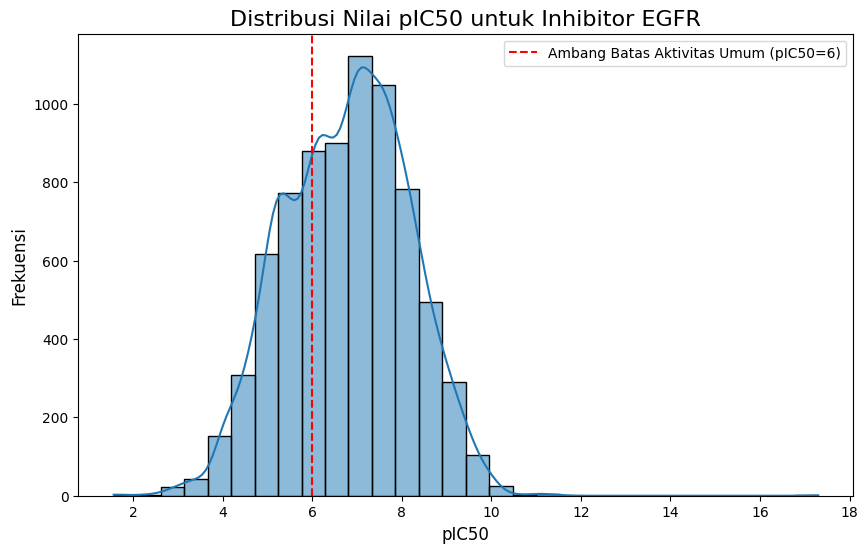

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(processed_df['pIC50'], bins=30, kde=True)
plt.title('Distribusi Nilai pIC50 untuk Inhibitor EGFR', fontsize=16)
plt.xlabel('pIC50', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.axvline(x=6, color='r', linestyle='--', label='Ambang Batas Aktivitas Umum (pIC50=6)')
plt.legend()
plt.show()

**Analisis :**

Nah, kalo diliat di grafik, mayoritas molekul tuh ngumpul antara pIC50 5 sampe 9. Artinya kebanyakan molekul di dataset kita punya potensi lumayan oke. Terus ada garis putus-putus merah di angka 6, itu tuh ambang batas umum yang sering dipake buat nentuin molekul “aktif” atau nggak. Jadi kalo pIC50 di atas 6, bisa dibilang molekul itu udah masuk kategori aktif alias IC50-nya kurang dari 1 µM.

Kalo kita lihat bentuk kurvanya, distribusinya agak mirip lonceng, artinya data lumayan tersebar normal. Tapi tetep ada ekor-ekor ke kanan—beberapa molekul punya pIC50 tinggi banget sampe di atas 10 bahkan 15, yang berarti molekulnya super kuat. Di sisi lain, ada juga yang di bawah 4, itu ibaratnya molekulnya lemah, hampir nggak ngaruh ke target.

Nah, informasi ini penting banget. Kenapa? Karena kita bisa ngerti komposisi dataset: banyak nggak sih molekul aktif dibanding yang nggak aktif? Dari grafik keliatan kalau jumlah molekul di sekitar atau di atas ambang batas 6 cukup banyak, jadi dataset kita lumayan balance buat ngenalin mana molekul yang aktif dan mana yang enggak. Bayangin kalo ternyata kebanyakan molekul nilainya di bawah 6, model kita mungkin jadi kurang pinter ngenalin pola molekul aktif karena datanya jarang.

Jadi dari distribusi ini, kesimpulannya dataset kita cukup sehat. Ada banyak contoh molekul aktif, ada juga yang nggak aktif, jadi model bisa belajar perbandingan dengan jelas. Plus, kehadiran molekul-molekul dengan pIC50 super tinggi juga bisa jadi contoh menarik buat mesin, biar dia bisa nangkep ciri-ciri “super inhibitor”.



### FISIKOKIMIA AND DRUG LIKENESS ANALYSIS

Kita udah bahas soal IC50 dan pIC50 tadi kan, intinya ngecek seberapa ganas molekul ngeblok target. Nah, sekarang kita geser dikit ke hal yang nggak kalah penting: sifat fisikokimia sama “drug-likeness”. Soalnya percuma banget kalo molekul punya afinitas tinggi tapi pas masuk ke badan malah gagal jadi obat gara-gara nggak bisa diserap atau terlalu ribet secara kimia.

Disini kita pake yang namanya Aturan Lima Lipinski (Rule of Five), bahasa gampangnya ini semacam aturan tongkrongan buat nentuin apakah sebuah molekul punya peluang bagus jadi obat oral atau nggak. Aturannya simpel: berat molekul nggak boleh kelewat gede (≤ 500 Dalton), jangan terlalu oily alias LogP ≤ 5, jumlah penerima ikatan hidrogen (HBA) nggak boleh lebih dari 10, dan jumlah donor ikatan hidrogen (HBD) nggak lebih dari 5. Kalau sebuah molekul ngelanggar lebih dari satu aturan ini, biasanya susah banget buat nyerapnya di tubuh.

Tabel Analisis Fisikokimia & Kepatuhan Ro5 (Contoh):


,canonical_smiles,molecule_chembl_id,IC50_nM,pIC50,MWT,LogP,HBD,HBA,RO5_Compliant
0,Br.CC(Nc1ncnc2[nH]c(-c3ccc(O)cc3)cc12)c1ccc(C(...,CHEMBL1914657,4608.0,5.336488,479.300,6.1003,3,4,True
1,Br.CC(Nc1ncnc2[nH]c(-c3ccc(O)cc3)cc12)c1cccc2c...,CHEMBL1914666,1008.0,5.996539,461.363,6.2347,3,4,True
2,Br.CC[C@@H](Nc1ncnc2[nH]c(-c3ccc(O)cc3)cc12)c1...,CHEMBL1914665,4.0,8.397940,425.330,5.4716,3,4,True
3,Br.C[C@@H](Nc1ncnc2[nH]c(-c3ccc(O)cc3)cc12)c1c...,CHEMBL1914655,62.0,7.207608,490.199,5.8440,3,4,True
4,Br.C[C@@H](Nc1ncnc2[nH]c(-c3ccc(O)cc3)cc12)c1c...,CHEMBL1914654,3.8,8.420216,429.293,5.2206,3,4,True


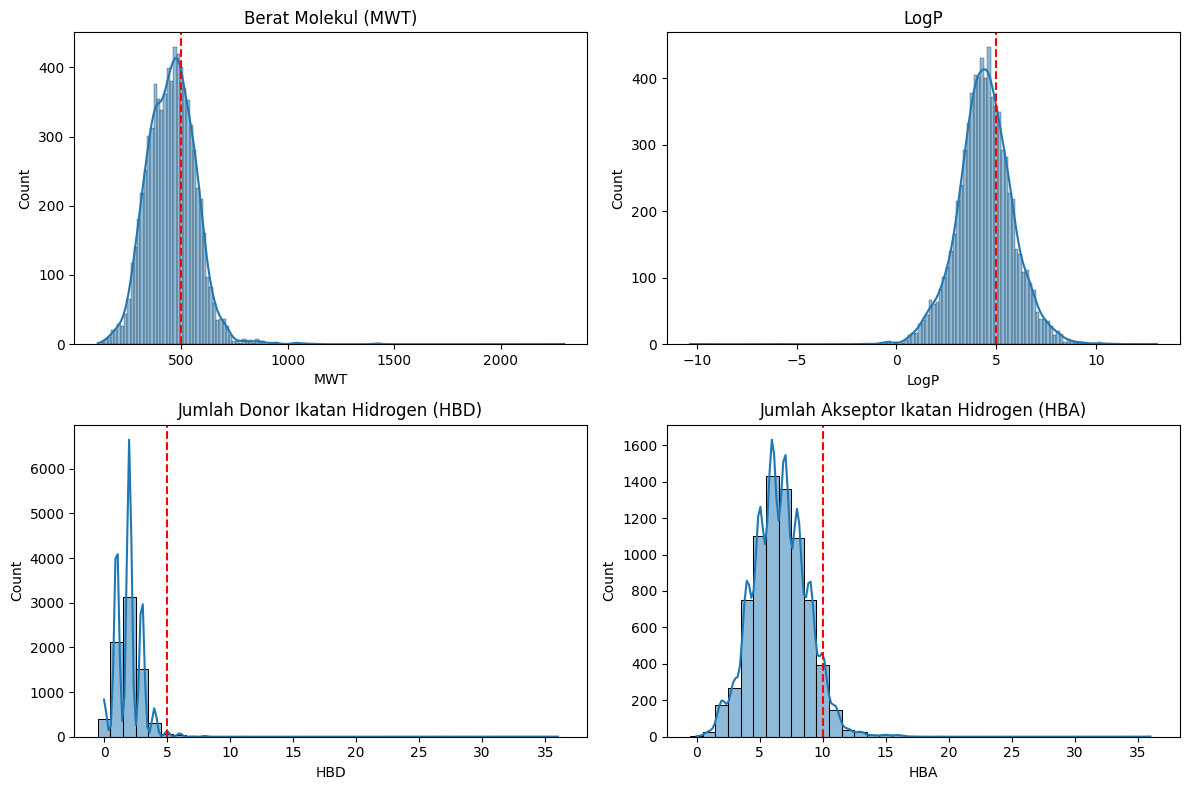

In [47]:
def calculate_lipinski_properties(smiles):
    """
    Menghitung properti Aturan Lima Lipinski dari SMILES.
    """
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return pd.Series([np.nan] * 5)

        mwt = Descriptors.MolWt(mol)
        logp = Descriptors.MolLogP(mol)
        hbd = Descriptors.NumHDonors(mol)
        hba = Descriptors.NumHAcceptors(mol)

        # Cek pelanggaran
        violations = 0
        if mwt > 500: violations += 1
        if logp > 5: violations += 1
        if hbd > 5: violations += 1
        if hba > 10: violations += 1

        ro5_compliant = violations <= 1

        return pd.Series([mwt, logp, hbd, hba, ro5_compliant])
    except:
        return pd.Series([np.nan] * 5)

# Terapkan fungsi ke dataframe
lipinski_df = processed_df['canonical_smiles'].apply(calculate_lipinski_properties)
lipinski_df.columns = ['MWT', 'LogP', 'HBD', 'HBA', 'RO5_Compliant']

# Gabungkan dengan dataframe utama
final_df = pd.concat([processed_df, lipinski_df], axis=1).dropna()

# Tampilkan hasilnya dalam tabel
print("Tabel Analisis Fisikokimia & Kepatuhan Ro5 (Contoh):")
display(final_df.head())

# Visualisasi distribusi sederhana
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(final_df['MWT'], kde=True)
plt.axvline(x=500, color='r', linestyle='--')
plt.title('Berat Molekul (MWT)')

plt.subplot(2, 2, 2)
sns.histplot(final_df['LogP'], kde=True)
plt.axvline(x=5, color='r', linestyle='--')
plt.title('LogP')

plt.subplot(2, 2, 3)
sns.histplot(final_df['HBD'], kde=True, discrete=True)
plt.axvline(x=5, color='r', linestyle='--')
plt.title('Jumlah Donor Ikatan Hidrogen (HBD)')

plt.subplot(2, 2, 4)
sns.histplot(final_df['HBA'], kde=True, discrete=True)
plt.axvline(x=10, color='r', linestyle='--')
plt.title('Jumlah Akseptor Ikatan Hidrogen (HBA)')

plt.tight_layout()
plt.show()

Nah sekarang liat grafik-grafiknya. Yang pertama soal Berat Molekul (MWT). Mayoritas molekul kita ngumpul di sekitar 400–500 Dalton, jadi masih aman. Ada memang beberapa outlier yang beratnya kelewat gede, tapi itu cuma minoritas. Terus grafik LogP, ini nunjukin seberapa “berminyak” molekul. Mayoritas masih di bawah atau sekitar 5, artinya balance antara suka air dan suka minyak, bagus lah buat bisa menembus membran sel tapi nggak terlalu “minyakan”. Ada yang kelewat tinggi sampe di atas 10, itu biasanya molekul terlalu hidrofobik, susah larut di air.

Lanjut ke Jumlah Donor Ikatan Hidrogen (HBD). Mayoritas molekul kita ada di bawah angka 5, sesuai aturan. Artinya molekul nggak terlalu banyak ngasih “tangan” buat ikatan hidrogen, jadi nggak bikin dia terlalu polar yang bikin susah nembus membran. Sedangkan di Jumlah Akseptor Ikatan Hidrogen (HBA), mayoritas juga ada di bawah 10, sesuai aturan lagi.

Jadi kalo dilihat keseluruhan, dataset kita lumayan cakep, kebanyakan molekulnya patuh sama Ro5. Itu artinya bukan cuma aktifitas biologisnya yang menjanjikan, tapi secara teori juga punya peluang jadi obat oral yang bisa diserap tubuh. Ada sih sebagian kecil yang ngeyel alias outlier, tapi itu nggak masalah. Malah kadang molekul-molekul “nyeleneh” itu bisa jadi menarik buat studi lebih lanjut, siapa tau punya mekanisme kerja beda yang unik.

Nah kenapa semua ini penting buat AI kita? Karena model AI nggak boleh cuma belajar dari sisi aktivitas biologis doang. Kalau AI cuma ngejar nilai pIC50 tinggi tapi nggak ngecek aturan fisikokimia, bisa-bisa nanti nemu “calon obat” yang di lab kelihatan mantap, tapi begitu diuji di tubuh beneran malah zonk. Analisis ini tuh semacam sanity check biar apa yang keluar dari model tetap grounded sama kenyataan kimia medisinal. Dengan gini, kita nggak cuma dapet prediksi yang keren di atas kertas, tapi juga yang ada kemungkinan beneran dipakai jadi obat di dunia nyata.

Kalau kita pindah ke gambar pertama yang menunjukkan distribusi sifat fisikokimia, cerita yang muncul lumayan positif. Berat molekul mayoritas berada di kisaran empat ratus hingga lima ratus Dalton, mendekati batas ideal. LogP sebagian besar juga berada di sekitar tiga sampai enam, walau ada yang sedikit kelewatan di atas lima, yang artinya molekul tersebut lebih cenderung hidrofobik dan bisa jadi agak susah larut. Jumlah donor dan akseptor ikatan hidrogen pun kebanyakan masih di dalam batas yang dianjurkan, walaupun ada sedikit outlier di ujung-ujung distribusi. Secara umum, grafik ini bilang bahwa sebagian besar molekul punya profil fisikokimia yang cukup “ramah” untuk obat oral.

Kalau kita cocokkan dengan tabel di gambar ketiga, hasilnya makin jelas. Contoh molekul yang ditampilkan semuanya lolos filter kepatuhan Lipinski, walaupun ada yang LogP-nya di atas lima. Itu artinya mereka mungkin melanggar satu aturan, tapi tetap bisa dianggap layak selama faktor lain terpenuhi. Molekul dengan LogP sedikit tinggi biasanya bisa diatasi lewat optimasi formulasi atau modifikasi struktur di tahap pengembangan berikutnya.

Jadi, kalau kita rangkum ceritanya, dataset ini cukup beruntung karena berisi banyak molekul yang bukan cuma aktif secara biologis (pIC50 di atas ambang), tapi juga punya sifat fisikokimia yang lumayan sesuai dengan kriteria drug-likeness. Tantangannya ada di molekul-molekul yang terlalu hidrofobik atau punya berat molekul tinggi, karena keduanya bisa mempengaruhi penyerapan. Tapi itu semua masih dalam batas wajar untuk tahap awal eksplorasi. Dengan kombinasi potensi dan kepatuhan fisikokimia yang seperti ini, kita punya landasan yang solid untuk melangkah ke analisis lanjutan atau optimasi struktur.

Okee sampe siniii.. proses EDA udah selesai, tinggal ekport aja data akhirnya untuk lanjut ke preprocessing

In [51]:
# Simpan final_df ke CSV di folder data yang selevel dengan EDA
OUTPUT_FILENAME = "../data/EGFR_bioactivity_cleaned.csv"
final_df.to_csv(OUTPUT_FILENAME, index=False)
print(f"Data hasil EDA berhasil disimpan ke file: {OUTPUT_FILENAME}")

Data hasil EDA berhasil disimpan ke file: ../data/EGFR_bioactivity_cleaned.csv
